In [1]:
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('REINVENT4_ref_frag_output_data.csv')

# Check column names
print(data.columns)

# Remove duplicates based on the correct column name
data = data.drop_duplicates(subset='GeneratedSMILES')

# Reference SMILE string to match and remove
reference_smile = "CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@H](N)CO3)c2n1"

# Remove rows where 'GeneratedSMILES' column matches the reference SMILE
data = data[data['GeneratedSMILES'] != reference_smile]
data.head()


Index(['GeneratedSMILES', 'SimilarityToReference', 'ESP', 'shape',
       'MolecularWeight', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'MolLogP',
       'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity',
       'OverallSimilarityToReference', 'FILE'],
      dtype='object')


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
0,CC(C)NC(=O)C1(Cc2ccc(-c3ccncc3)cc2)CCN(Cc2cccc...,0.234234,0.355512,0.484410,445.582,1,3,45.23,5.23720,9,4,5.23720,129.9997,0.002033,mol2mol_mmp_Asinex.csv
1,Cc1ccnn1CCC(=O)N1CCC(Cc2ccccc2-c2cccc(F)c2)(C(...,0.193277,0.316901,0.510200,448.542,1,4,81.22,3.72452,8,4,3.72452,124.5624,0.002697,mol2mol_mmp_Asinex.csv
2,Cc1ncoc1C(=O)N1CCC(Cc2ccc(-c3cccnc3)cc2)(C(=O)...,0.232759,0.332681,0.521743,446.551,1,5,88.33,4.03472,9,4,4.03472,125.4662,0.003515,mol2mol_mmp_Asinex.csv
3,CN(C)C(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(C(=O)CC(...,0.200000,0.415312,0.513111,421.585,0,3,53.51,4.42430,7,3,4.42430,124.3900,0.001684,mol2mol_mmp_Asinex.csv
4,CNC(=O)C1(Cc2ccc(-c3cccnc3)cc2)CCN(C(=O)COc2cc...,0.236364,0.405316,0.502266,443.547,1,4,71.53,3.72490,8,4,3.72490,127.6277,0.002781,mol2mol_mmp_Asinex.csv


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1795
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GeneratedSMILES               1020 non-null   object 
 1   SimilarityToReference         1020 non-null   float64
 2   ESP                           1020 non-null   float64
 3   shape                         1020 non-null   float64
 4   MolecularWeight               1020 non-null   float64
 5   NumHDonors                    1020 non-null   int64  
 6   NumHAcceptors                 1020 non-null   int64  
 7   TPSA                          1020 non-null   float64
 8   MolLogP                       1020 non-null   float64
 9   NumRotatableBonds             1020 non-null   int64  
 10  NumRings                      1020 non-null   int64  
 11  ClogP                         1020 non-null   float64
 12  MolarRefractivity             1020 non-null   float64
 13  Ove

In [4]:
data.describe()

,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.493356,0.622926,0.685791,455.058127,1.564706,6.319608,85.970127,3.913518,7.388235,4.401961,3.913518,125.298666,0.033392
std,0.241473,0.204962,0.166027,68.093805,0.724403,2.233171,24.317638,0.980300,1.774937,0.837771,0.980300,17.581258,0.115704
min,0.089286,0.000000,0.258991,156.141000,0.000000,1.000000,3.240000,-1.565980,0.000000,1.000000,-1.565980,33.487800,0.000255
25%,0.220183,0.416103,0.499398,428.362500,1.000000,4.000000,71.315000,3.343100,6.000000,4.000000,3.343100,120.651100,0.002103
50%,0.556725,0.700269,0.760051,476.968000,2.000000,7.000000,85.830000,3.911400,7.000000,5.000000,3.911400,129.999700,0.010416
75%,0.700287,0.792855,0.823904,498.921000,2.000000,8.000000,103.650000,4.547225,8.000000,5.000000,4.547225,136.126900,0.020202
max,1.000000,0.987284,0.962232,625.833000,5.000000,13.000000,205.380000,7.404800,17.000000,6.000000,7.404800,166.156700,1.000000


In [5]:
max_similarity_index = data['OverallSimilarityToReference'].idxmax()
max_similarity_row = data.loc[max_similarity_index]
print(f"The row with the maximum value in 'OverallSimilarityToReference' column:")
print(max_similarity_row)
max_similarity_row.GeneratedSMILES

The row with the maximum value in 'OverallSimilarityToReference' column:
GeneratedSMILES                 CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
SimilarityToReference                                                         1.0
ESP                                                                      0.946112
shape                                                                    0.894607
MolecularWeight                                                            496.93
NumHDonors                                                                      2
NumHAcceptors                                                                   9
TPSA                                                                       117.18
MolLogP                                                                    3.0549
NumRotatableBonds                                                               7
NumRings                                                                        5
ClogP                    

'CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@@H](N)CO3)c2n1'

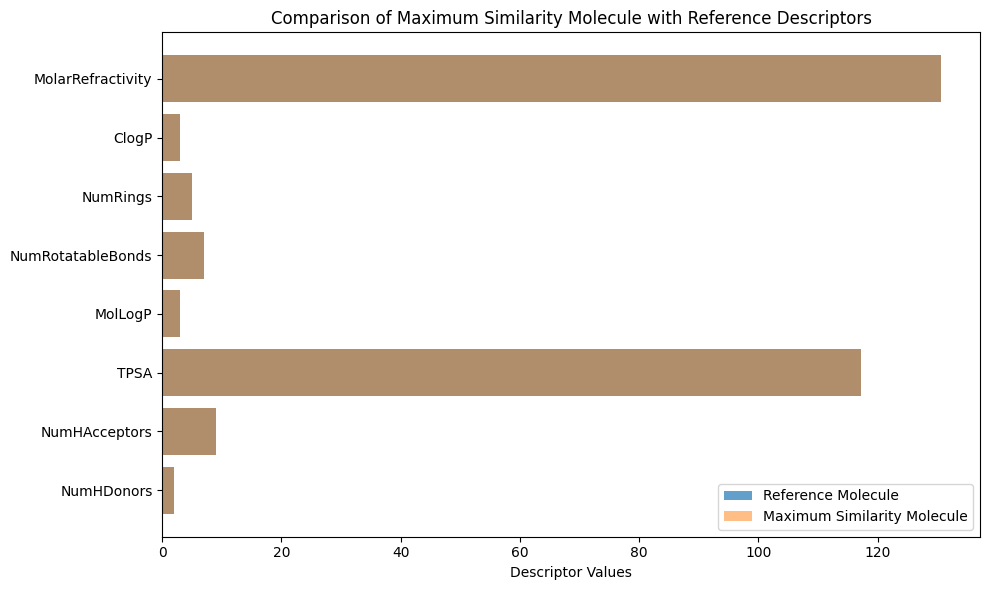

In [6]:

# Data for the molecule with the maximum value in 'OverallSimilarityToReference' column
max_similarity_row = data.loc[data['OverallSimilarityToReference'].idxmax()]

# Reference Descriptors
reference_descriptors = {
    'NumHDonors': 2,
    'NumHAcceptors': 9,
    'TPSA': 117.18,
    'MolLogP': 3.0549,
    'NumRotatableBonds': 7,
    'NumRings': 5,
    'ClogP': 3.0549,
    'MolarRefractivity': 130.6471
}

# Extracting relevant descriptors
reference_data = [reference_descriptors[key] for key in reference_descriptors]
molecule_data = [
    max_similarity_row['NumHDonors'],
    max_similarity_row['NumHAcceptors'],
    max_similarity_row['TPSA'],
    max_similarity_row['MolLogP'],
    max_similarity_row['NumRotatableBonds'],
    max_similarity_row['NumRings'],
    max_similarity_row['ClogP'],
    max_similarity_row['MolarRefractivity']
]

# Descriptor labels
descriptors = list(reference_descriptors.keys())

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(descriptors, reference_data, label='Reference Molecule', alpha=0.7)
plt.barh(descriptors, molecule_data, label='Maximum Similarity Molecule', alpha=0.5)
plt.xlabel('Descriptor Values')
plt.title('Comparison of Maximum Similarity Molecule with Reference Descriptors')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Assuming 'data' is your DataFrame

# Filtering and sorting the DataFrame by 'OverallSimilarityToReference' for top 20 values
best_5 = data.sort_values('OverallSimilarityToReference', ascending=False)[:30]

# Extracting top 5 SMILES from the 'GeneratedSMILES' column
top_5_smiles = best_5['GeneratedSMILES'].tolist()

# Exporting to a text file
# with open('top_5_smiles_REINVENT4_ref_frag.txt', 'w') as file:
#     for smile in top_5_smiles:
#         file.write(smile + '\n')

# Displaying the first two SMILES for verification
print(top_5_smiles[0])  # First SMILE
print(top_5_smiles[1])  # Second SMILE

# Displaying the DataFrame of top 5 for reference
best_5


CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@@H](N)CO3)c2n1
CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3OCC(N)CO3)c2n1


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
151,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,1.000000,0.946112,0.894607,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,1.000000,mol2mol_mmp_MiniFrag.csv
784,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3O...,1.000000,0.986955,0.914442,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,1.000000,mol2mol_scaffold_generic_pharmacophore.csv
362,CNc1ncc2cc(-c3cccc(-c4ncccc4F)c3Cl)c(=O)n(C[C@...,0.804878,0.792779,0.662115,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.925745,mol2mol_mmp_pharmacophore.csv
674,CNc1ncc2cc(-c3ccc(-c4cncc(F)c4)cc3Cl)c(=O)n(C[...,0.773810,0.731076,0.811867,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.910897,mol2mol_scaffold_generic_MiniFrag.csv
900,CNc1ncc2cc(-c3ccc(-c4cccnc4F)cc3Cl)c(=O)n(C[C@...,0.839506,0.816809,0.935480,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.909434,mol2mol_high_similarity.csv
992,CNc1ncc2cc(-c3ccc(-c4cccnc4F)cc3Cl)c(=O)n(CC3O...,0.839506,0.753252,0.826023,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.909434,mol2mol_high_similarity.csv
948,CNc1ncc2cc(-c3ccc(-c4cccnc4F)cc3Cl)c(=O)n(C[C@...,0.839506,0.722358,0.878617,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.909434,mol2mol_high_similarity.csv
682,CNc1ncc2cc(-c3ccc(-c4cnccc4F)cc3Cl)c(=O)n(C[C@...,0.827160,0.830043,0.919210,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.903857,mol2mol_scaffold_generic_MiniFrag.csv
1009,CNc1ncc2cc(-c3ccc(-c4cnccc4F)cc3Cl)c(=O)n(CC3O...,0.827160,0.827547,0.840247,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.903857,mol2mol_high_similarity.csv
286,CNc1ncc2cc(-c3ccc(-c4cnccc4F)cc3Cl)c(=O)n(C[C@...,0.827160,0.871584,0.899953,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.903857,mol2mol_mmp_MiniFrag.csv


In [8]:
data.sort_values('SimilarityToReference', ascending=False)[11:20]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
959,CNc1ncc2cc(-c3ccc(-c4nnccc4F)cc3Cl)c(=O)n(C[C@...,0.864198,0.832295,0.857706,497.918,2,10,130.07,2.44990,7,5,2.44990,128.4421,0.044464,mol2mol_high_similarity.csv
927,CCNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3...,0.864198,0.887669,0.876519,510.957,2,9,117.18,3.44500,8,5,3.44500,135.2641,0.054657,mol2mol_high_similarity.csv
165,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.862500,0.921628,0.804590,511.941,1,9,100.39,3.74260,8,5,3.74260,133.4687,0.029452,mol2mol_mmp_MiniFrag.csv
236,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3C)c(=O)n(C[C@H...,0.862500,0.966468,0.931613,476.512,2,9,117.18,2.70992,8,5,2.70992,130.3741,0.040210,mol2mol_mmp_MiniFrag.csv
358,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3)c(=O)n(C[C@H]...,0.857143,0.911130,0.829475,462.485,2,9,117.18,2.40150,7,5,2.40150,125.6371,0.161354,mol2mol_mmp_pharmacophore.csv
1023,CNc1ncc2cc(-c3ccc(-c4ncccc4OC)cc3Cl)c(=O)n(C[C...,0.853659,0.826988,0.751710,508.966,2,10,126.41,2.92440,9,5,2.92440,137.2411,0.042528,mol2mol_high_similarity.csv
252,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.853659,0.808922,0.758034,480.931,2,8,107.95,3.47090,7,5,3.47090,129.3121,0.039296,mol2mol_mmp_MiniFrag.csv
200,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.853659,0.774743,0.798803,480.931,2,8,107.95,3.47090,7,5,3.47090,129.3121,0.039296,mol2mol_mmp_MiniFrag.csv
185,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.853659,0.783098,0.816254,480.931,2,8,107.95,3.47090,7,5,3.47090,129.3121,0.039296,mol2mol_mmp_MiniFrag.csv


In [9]:
data.sort_values('ESP', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
176,CCNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C...,0.864198,0.987284,0.884722,510.957,2,9,117.18,3.44500,8,5,3.44500,135.2641,0.054657,mol2mol_mmp_MiniFrag.csv
784,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3O...,1.000000,0.986955,0.914442,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,1.000000,mol2mol_scaffold_generic_pharmacophore.csv
333,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3F)c(=O)n(C[C@H...,0.884615,0.984801,0.950251,480.475,2,9,117.18,2.54060,7,5,2.54060,125.5951,0.061982,mol2mol_mmp_pharmacophore.csv
1629,CNc1ncc2cc(-c3ccc(-c4ncccc4Cl)cc3Cl)c(=O)n(C[C...,0.896104,0.980268,0.962232,513.385,2,9,117.18,3.56920,7,5,3.56920,135.6991,0.062610,mol2mol_similarity.csv
236,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3C)c(=O)n(C[C@H...,0.862500,0.966468,0.931613,476.512,2,9,117.18,2.70992,8,5,2.70992,130.3741,0.040210,mol2mol_mmp_MiniFrag.csv
253,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(-c4ncccc4F)cc3...,0.839506,0.964304,0.847318,522.968,2,9,117.18,3.58750,7,6,3.58750,137.7451,0.029964,mol2mol_mmp_MiniFrag.csv
1025,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.809524,0.957685,0.835248,539.011,1,9,94.40,3.90540,10,5,3.90540,144.7157,0.014472,mol2mol_high_similarity.csv
398,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3O...,0.835443,0.951779,0.878845,481.915,1,8,91.16,4.11770,6,5,4.11770,127.2887,0.020401,mol2mol_mmp_pharmacophore.csv
987,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.817073,0.949195,0.910663,481.915,1,8,91.16,4.11610,7,5,4.11610,127.2667,0.019958,mol2mol_high_similarity.csv
151,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,1.000000,0.946112,0.894607,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,1.000000,mol2mol_mmp_MiniFrag.csv


In [10]:
data.sort_values('shape', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
1629,CNc1ncc2cc(-c3ccc(-c4ncccc4Cl)cc3Cl)c(=O)n(C[C...,0.896104,0.980268,0.962232,513.385,2,9,117.18,3.56920,7,5,3.56920,135.6991,0.062610,mol2mol_similarity.csv
333,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3F)c(=O)n(C[C@H...,0.884615,0.984801,0.950251,480.475,2,9,117.18,2.54060,7,5,2.54060,125.5951,0.061982,mol2mol_mmp_pharmacophore.csv
816,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.788235,0.829180,0.938712,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.902159,mol2mol_scaffold_generic_pharmacophore.csv
900,CNc1ncc2cc(-c3ccc(-c4cccnc4F)cc3Cl)c(=O)n(C[C@...,0.839506,0.816809,0.935480,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.909434,mol2mol_high_similarity.csv
830,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.711111,0.919619,0.933085,496.930,3,9,114.19,2.66150,7,5,2.66150,130.7292,0.230465,mol2mol_scaffold_generic_pharmacophore.csv
236,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3C)c(=O)n(C[C@H...,0.862500,0.966468,0.931613,476.512,2,9,117.18,2.70992,8,5,2.70992,130.3741,0.040210,mol2mol_mmp_MiniFrag.csv
682,CNc1ncc2cc(-c3ccc(-c4cnccc4F)cc3Cl)c(=O)n(C[C@...,0.827160,0.830043,0.919210,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.903857,mol2mol_scaffold_generic_MiniFrag.csv
981,CNc1ncc2cc(-c3ccc(-c4ccncc4F)cc3Cl)c(=O)n(C[C@...,0.817073,0.735769,0.916448,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,0.892084,mol2mol_high_similarity.csv
784,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3O...,1.000000,0.986955,0.914442,496.930,2,9,117.18,3.05490,7,5,3.05490,130.6471,1.000000,mol2mol_scaffold_generic_pharmacophore.csv
987,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.817073,0.949195,0.910663,481.915,1,8,91.16,4.11610,7,5,4.11610,127.2667,0.019958,mol2mol_high_similarity.csv


In [11]:
data.sort_values('TPSA', ascending=False)[:10]


,GeneratedSMILES,SimilarityToReference,ESP,shape,MolecularWeight,NumHDonors,NumHAcceptors,TPSA,MolLogP,NumRotatableBonds,NumRings,ClogP,MolarRefractivity,OverallSimilarityToReference,FILE
1780,CNC(=O)OCC1(COC(C)=O)OCC(CC(=O)NCCC(=O)NCC2OC(...,0.217054,0.361580,0.381923,573.581,4,13,205.38,-1.56598,15,3,-1.56598,133.4108,0.001468,sampling_reinvent_ref_2nd_step.csv
1794,CN(Cc1cccc(C(N)=O)n1)c1ccc(C(=O)NC(CCC(=O)O)C(...,0.153226,0.267235,0.475701,458.427,5,10,200.22,0.56290,12,2,0.56290,114.0230,0.001217,sampling_reinvent_ref_2nd_step.csv
269,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.823529,0.859715,0.780849,538.971,3,9,155.56,2.36960,7,5,2.36960,142.2695,0.011657,mol2mol_mmp_MiniFrag.csv
1182,CNc1ncc2cc(-c3ccc(-n4cncc(C)c4=O)cc3Cl)c(=O)n(...,0.666667,0.836173,0.852208,509.954,2,11,139.18,1.70812,8,5,1.70812,135.5871,0.018931,mol2mol_medium_similarity.csv
289,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(-c4ncccc4F)cc3...,0.618557,0.736513,0.804949,540.983,3,10,137.41,2.80750,10,5,2.80750,141.2929,0.011308,mol2mol_mmp_MiniFrag.csv
1011,N[C@H]1CO[C@@H](Cn2c(=O)c(-c3ccc(-c4ncccc4F)cc...,0.781609,0.801179,0.741692,540.983,3,10,137.41,2.80750,10,5,2.80750,141.2929,0.014289,mol2mol_high_similarity.csv
290,N[C@H]1CO[C@H](Cn2c(=O)c(-c3ccc(-c4ncccc4F)cc3...,0.781609,0.864402,0.812171,540.983,3,10,137.41,2.80750,10,5,2.80750,141.2929,0.014289,mol2mol_mmp_MiniFrag.csv
193,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.790698,0.736393,0.786175,575.022,2,10,137.33,2.64540,9,5,2.64540,144.4392,0.009270,mol2mol_mmp_MiniFrag.csv
1740,CNCC(=O)N(CC(=O)NC)Cc1ccc(C(=O)Nc2ccc(Cl)cc2C(...,0.152000,0.445867,0.419611,557.438,4,5,135.76,2.60890,11,3,2.60890,144.9538,0.002209,sampling_reinvent_ref_2nd_step.csv
1018,CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...,0.811765,0.817174,0.839414,510.913,2,9,134.25,2.58150,7,5,2.58150,130.7871,0.028083,mol2mol_high_similarity.csv


In [12]:
best_5
value = best_5.iloc[1, best_5.columns.get_loc('GeneratedSMILES')]
top_smile = best_5.iloc[0, best_5.columns.get_loc('GeneratedSMILES')]
value

'CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(CC3OCC(N)CO3)c2n1'

In [13]:
# Save the SMILES value to a file named 'output.smi'
with open('output.smi', 'w') as file:
    file.write(value)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 23.9 MB/s eta 0:00:00


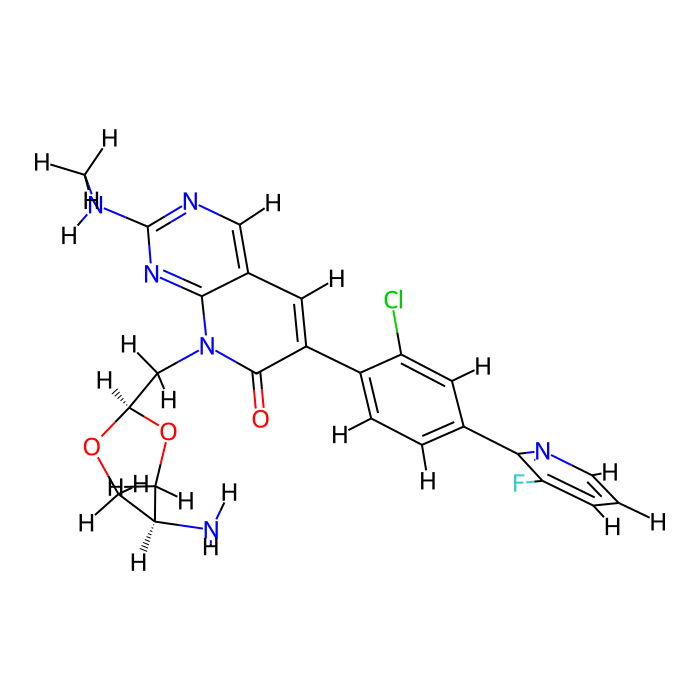

In [14]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from IPython.display import display

smiles_string = top_smile
# Generate 3D structure
# Your ML-generated SMILES string
# smiles_string = "O=C(c1ccc2ccoc2c1)N1CCC(C(=O)N2CCCC2)CC1"
mol = Chem.MolFromSmiles(smiles_string)
mol = Chem.AddHs(mol)

# Experiment with different parameters
AllChem.EmbedMolecule(mol, randomSeed=42)  # Try different seeds
AllChem.MMFFOptimizeMolecule(mol, maxIters=1000, nonBondedThresh=100.0)  # Adjust optimization parameters

# Visualize the 3D structure
img = Draw.MolToImage(mol, size=(700, 700))
display(img)


In [15]:
!pip install py3Dmol

from IPython.display import display, HTML
import py3Dmol
# Visualize the 3D structure
viewer = py3Dmol.view(width=400, height=400)
viewer.addModel(Chem.MolToMolBlock(mol), "mol")
viewer.setStyle({'stick': {}})
viewer.setBackgroundColor('white')
viewer.zoomTo()
viewer.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [16]:
# Save to SDF file
sdf_file = "output.sdf"
w_sdf = Chem.SDWriter(sdf_file)
w_sdf.write(mol)
w_sdf.close()


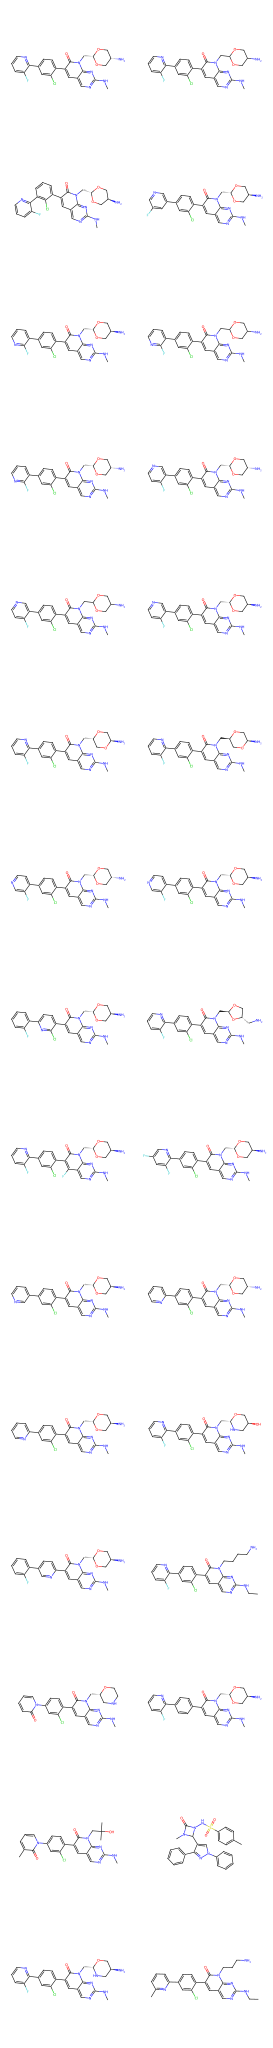

In [19]:
# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smile) for smile in top_5_smiles]

# Draw the 2D structures of the molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=2, subImgSize=(500, 500), useSVG=True)
display(img)

In [17]:
!pip install pandas matplotlib seaborn scikit-learn


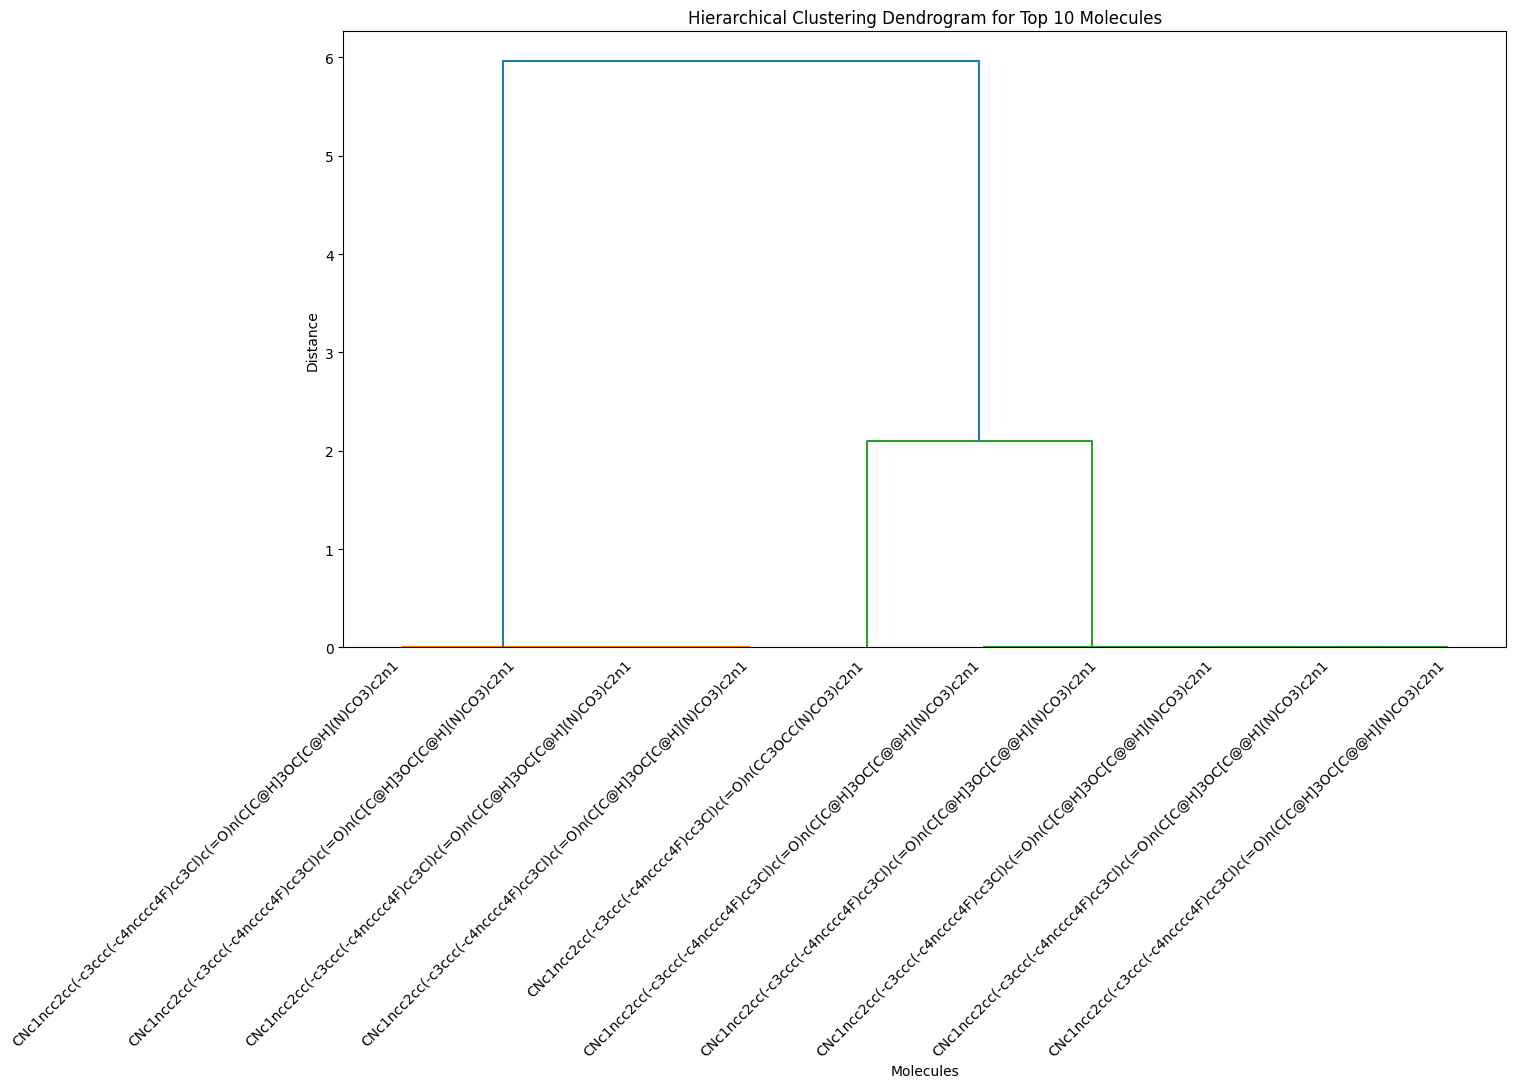

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Load data
data = pd.read_csv('REINVENT4_ref_frag_output_data.csv')

# Select the top 10 molecules based on 'OverallSimilarityToReference'
top_10 = data.nlargest(10, 'OverallSimilarityToReference')

# Extract relevant features for clustering
features = top_10[['SimilarityToReference', 'ESP', 'shape', 'MolecularWeight', 'NumHDonors', 'NumHAcceptors',
                   'TPSA', 'MolLogP', 'NumRotatableBonds', 'NumRings', 'ClogP', 'MolarRefractivity']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate pairwise distances
distances = pdist(scaled_features, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=top_10['GeneratedSMILES'].tolist(), orientation='top', leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram for Top 10 Molecules')
plt.xlabel('Molecules')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

plt.show()

# Choose the number of clusters based on dendrogram or other criteria
num_clusters = 3  # Adjust as needed

# Perform clustering with AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
top_10['Cluster'] = cluster_model.fit_predict(scaled_features)

# Print the clustered molecules in the top 10
for cluster_id in range(num_clusters):
    cluster_data = top_10[top_10['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id + 1}:')
    print(cluster_data['GeneratedSMILES'])

    # Provide interpretation based on average values of features
    avg_values = cluster_data.mean()
    print('\nAverage Values:')
    print(avg_values[features.columns])



Cluster 1:
151    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
310    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
614    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
747    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
898    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
Name: GeneratedSMILES, dtype: object

Average Values:
SimilarityToReference      1.000000
ESP                        0.946112
shape                      0.894607
MolecularWeight          496.930000
NumHDonors                 2.000000
NumHAcceptors              9.000000
TPSA                     117.180000
MolLogP                    3.054900
NumRotatableBonds          7.000000
NumRings                   5.000000
ClogP                      3.054900
MolarRefractivity        130.647100
dtype: float64

Cluster 2:
188    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
325    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
603    CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@...
744    CNc1ncc2cc(-

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-18-b095ee533345>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-b095ee533345>:52: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_values = cluster_data.mean()
<ipython-input-18-b095ee533345>:52: FutureWarning: The default value of numeric_only in DataFra